In [44]:
from os.path import join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [13, 5]

root = "/home/tbarba/projects/MultiModalBrainSurvival/outputs/test"


datasets = ["UKB", "UPENN", "UCSF", "SCHIZO",  "ADNI", "TCGA"]
models = [
    # "AE_single",
    "AE_selection2",
    "VAE3D_selection2",
    "RADIOMICS",
    # "comb_AE_selection2",
    # "GAE_selection2",
    # "comb_GAE_selection2",
    # "UVAE_selection2",
    # "AE_selection",
    # "AE_selection_attn",
    # "uVAE_fused_single2", 
    # "VAE3D_selection2",
    # "VAE3D_fused_single", 
    # "VAE3D_selection",
    # "AE_selection",
    #   "2mod_uVAE_fused",
          ]

dfs = []
for d in datasets:
    print(d)
    for m in models:
        try:
            df = pd.read_csv(join(root, d, f"multivariate/{m}.csv"))
            df["model"] = m
            df["dataset"] = d
            dfs.append(df)
        except:
            pass
df = pd.concat(dfs)


UKB
UPENN
UCSF
SCHIZO
ADNI
TCGA


In [45]:
ukb_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UKBIOBANK/metadata/0-variable_list.csv", index_col="category").sort_index()
tcga_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/TCGA/metadata/0-variable_list.csv", index_col="category").sort_index()
upenn_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UPENN/metadata/0-variable_list.csv", index_col="category").sort_index()
ucsf_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UCSF/metadata/0-variable_list.csv", index_col="category").sort_index()
adni_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/ADNI/metadata/0-variable_list.csv", index_col="category").sort_index()
schizo_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/SCHIZO/metadata/0-variable_list.csv", index_col="category").sort_index()

variables = pd.concat([ukb_vars, tcga_vars, upenn_vars, ucsf_vars, adni_vars, schizo_vars], axis=0).query("keep_model")["var"].reset_index()
df = pd.merge(df, variables, left_on="variable", right_on="var").drop("var", axis=1)

In [46]:
df

,variable,split,performance,metric,ibs,variance,num_classes,N,missing_rate,model,restored,dataset,category
0,Volumetric_scaling_from_T1_head_image_to_stand...,1,0.6661,r2,NaN,1.003282,NaN,3991,0.0,AE_selection2,False,UKB,mri
1,Volumetric_scaling_from_T1_head_image_to_stand...,2,0.6577,r2,NaN,0.998037,NaN,3991,0.0,AE_selection2,False,UKB,mri
2,Volumetric_scaling_from_T1_head_image_to_stand...,3,0.6524,r2,NaN,0.998823,NaN,3991,0.0,AE_selection2,False,UKB,mri
3,Volumetric_scaling_from_T1_head_image_to_stand...,4,0.6647,r2,NaN,0.994606,NaN,3991,0.0,AE_selection2,False,UKB,mri
4,Volumetric_scaling_from_T1_head_image_to_stand...,5,0.6405,r2,NaN,1.005427,NaN,3991,0.0,AE_selection2,False,UKB,mri
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,grade,1,0.7561,f1_weighted,NaN,1.000000,2.0,41,0.0,RADIOMICS,False,TCGA,cancer
1467,grade,2,0.8780,f1_weighted,NaN,1.000000,2.0,41,0.0,RADIOMICS,False,TCGA,cancer
1468,grade,3,0.8780,f1_weighted,NaN,1.000000,2.0,41,0.0,RADIOMICS,False,TCGA,cancer
1469,grade,4,0.9512,f1_weighted,NaN,1.000000,2.0,41,0.0,RADIOMICS,False,TCGA,cancer


UKB
UPENN
UCSF
SCHIZO
ADNI
TCGA


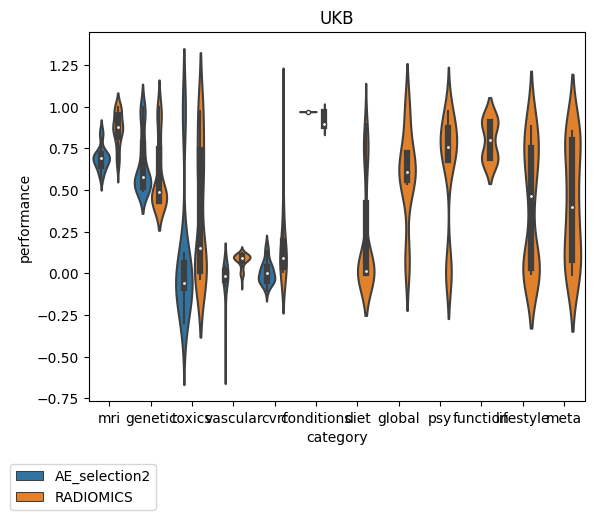

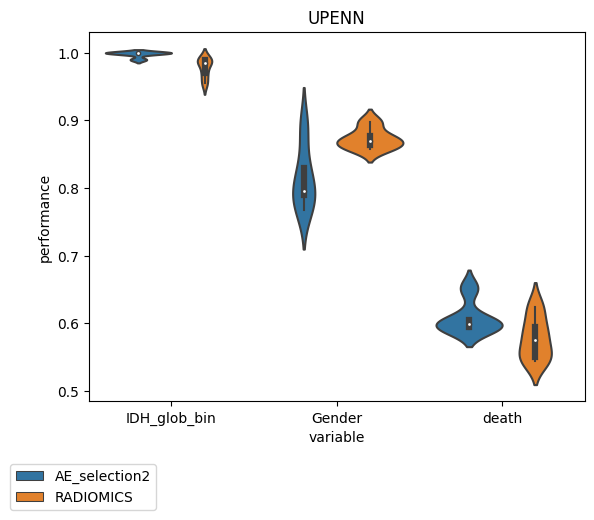

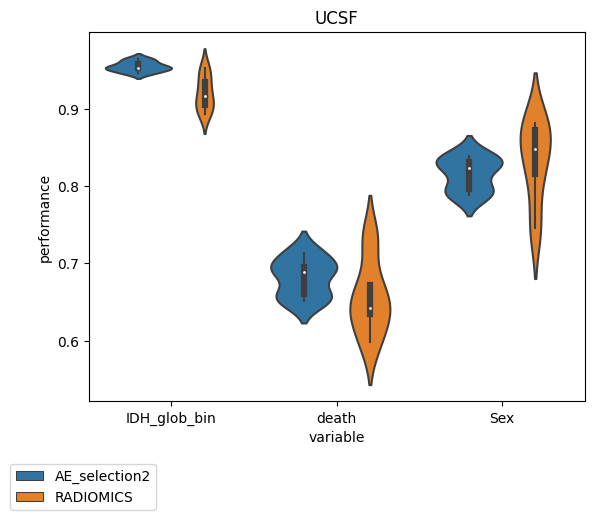

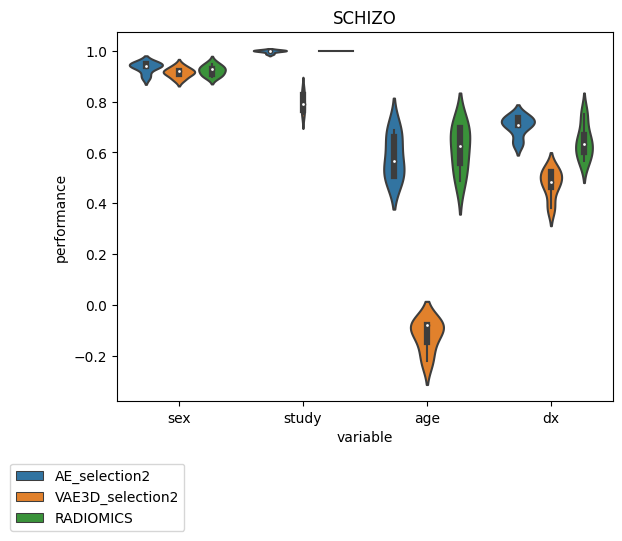

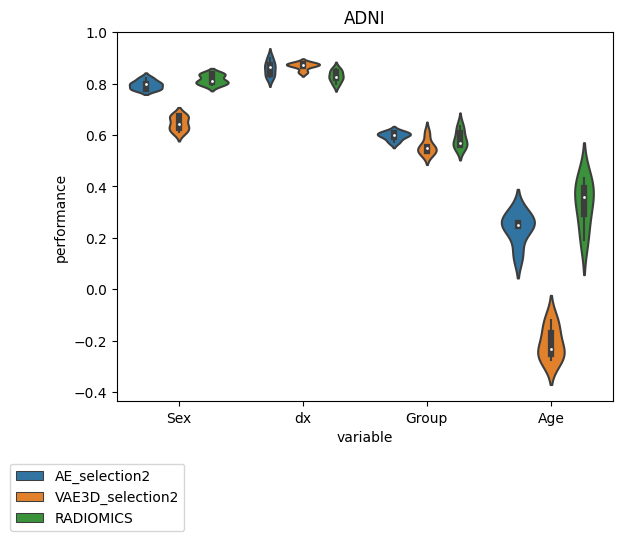

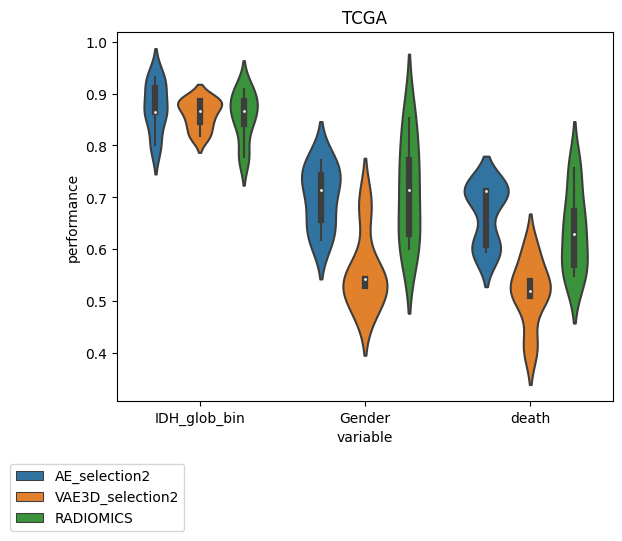

In [47]:

for dataset in datasets:
    X = "category" if dataset == "UKB" else "variable"
    print(dataset)
    plt.figure()
    sub = df.query("dataset == @dataset and 'grade' not in variable")#.sort_values(by=["model", "variable"])
    sns.violinplot(sub, x = X, y="performance", hue="model")
    plt.legend(bbox_to_anchor=(0.15, -0.15))
    plt.title(dataset)


In [37]:
sub = df.query("dataset == @dataset and 'grade' not in variable")#.sort_values(by=["model", "variable"])

In [40]:
df.dataset.value_counts()

UKB      1011
TCGA      135
UPENN      80
UCSF       70
ADNI       15
Name: dataset, dtype: int64